In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")
    if IS_KAGGLE:
        print("Go to Settings > Accelerator and select GPU.")

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

 Label Description
     0 T-shirt/top
     1     Trouser
     2    Pullover
     3       Dress
     4        Coat
     5      Sandal
     6       Shirt
     7     Sneaker
     8         Bag
     9  Ankle boot


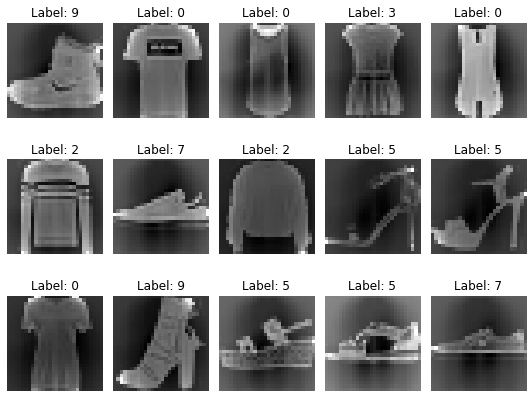

In [4]:
# SHOW LABELS
# initialize list of lists
data = [[0, 'T-shirt/top'], [1, 'Trouser'], [2, 'Pullover'], [3, 'Dress'], [4, 'Coat'], [5, 'Sandal'], [6, 'Shirt'], [7, 'Sneaker'], [8, 'Bag'], [9, 'Ankle boot']]
 
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Label', 'Description'])

# print dataframe
print(df.to_string(index=False))

# PRINT IMAGES
# specify the number of rows and columns you want to see
num_row = 3
num_col = 5

# get a segment of the dataset
num = num_row*num_col
images = X_train[:num]
labels = y_train[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
    ax.axis("off")
plt.tight_layout()
plt.show()

In [5]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [6]:

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:100] # pretend we have new images
y_pred = model.predict(X_new)

Epoch 1/10
1719/1719 [==============================] - 33s 17ms/step - loss: 0.7258 - accuracy: 0.7471 - val_loss: 0.3631 - val_accuracy: 0.8650
Epoch 2/10
1719/1719 [==============================] - 28s 16ms/step - loss: 0.4245 - accuracy: 0.8576 - val_loss: 0.3491 - val_accuracy: 0.8684
Epoch 3/10
1719/1719 [==============================] - 28s 16ms/step - loss: 0.3688 - accuracy: 0.8755 - val_loss: 0.3179 - val_accuracy: 0.8794
Epoch 4/10
1719/1719 [==============================] - 28s 16ms/step - loss: 0.3361 - accuracy: 0.8885 - val_loss: 0.2971 - val_accuracy: 0.8934
Epoch 5/10
1719/1719 [==============================] - 29s 17ms/step - loss: 0.3150 - accuracy: 0.8935 - val_loss: 0.3028 - val_accuracy: 0.8896
Epoch 6/10
1719/1719 [==============================] - 30s 17ms/step - loss: 0.2994 - accuracy: 0.8982 - val_loss: 0.3123 - val_accuracy: 0.8918
Epoch 7/10
1719/1719 [==============================] - 30s 17ms/step - loss: 0.2910 - accuracy: 0.9012 - val_loss: 0.3075 -

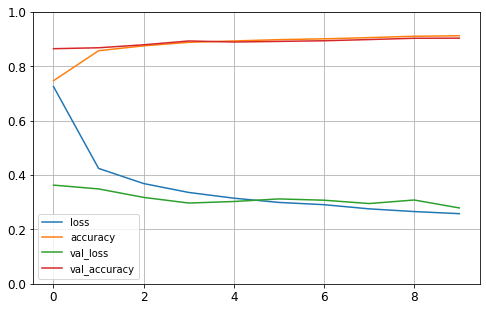

Test loss: 0.2997300624847412
Test accuracy: 0.9016000032424927


In [7]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # Wyznacza zakres osi pionowej od 0 do 1
plt.show()

print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

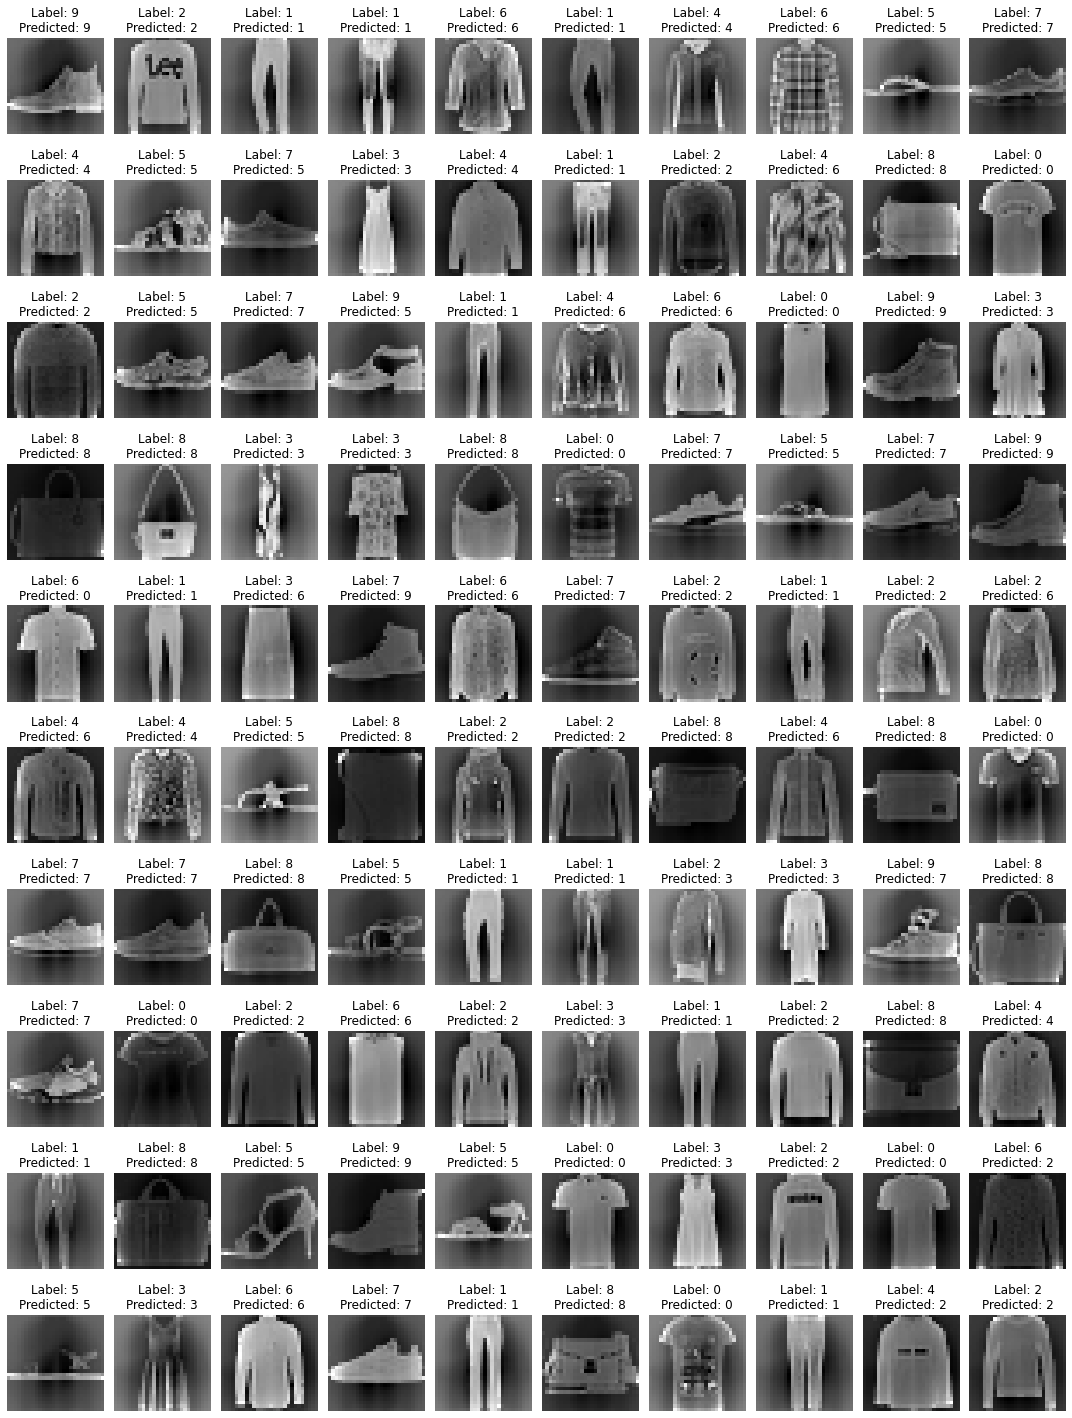

FAILED PREDICTION FOR: 12
True Label: 7	Estimated: 5
FAILED PREDICTION FOR: 17
True Label: 4	Estimated: 6
FAILED PREDICTION FOR: 23
True Label: 9	Estimated: 5
FAILED PREDICTION FOR: 25
True Label: 4	Estimated: 6
FAILED PREDICTION FOR: 40
True Label: 6	Estimated: 0
FAILED PREDICTION FOR: 42
True Label: 3	Estimated: 6
FAILED PREDICTION FOR: 43
True Label: 7	Estimated: 9
FAILED PREDICTION FOR: 49
True Label: 2	Estimated: 6
FAILED PREDICTION FOR: 50
True Label: 4	Estimated: 6
FAILED PREDICTION FOR: 57
True Label: 4	Estimated: 6
FAILED PREDICTION FOR: 66
True Label: 2	Estimated: 3
FAILED PREDICTION FOR: 68
True Label: 9	Estimated: 7
FAILED PREDICTION FOR: 89
True Label: 6	Estimated: 2
FAILED PREDICTION FOR: 98
True Label: 4	Estimated: 2


In [8]:
# PRINT IMAGES
# specify the number of rows and columns you want to see
num_row = 10
num_col = 10

# get max idexes
import operator
index_list = []
for i in y_pred:
    max_index, max_value = max(enumerate(i), key=operator.itemgetter(1))
    index_list.append(max_index)

# get a segment of the dataset
num = num_row*num_col
images = X_new[:num]
true_labels = y_test[:num]
predicted_labels = index_list
failed = []


# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {true}\nPredicted: {pred}'.format(true=true_labels[i], pred=predicted_labels[i]))
    #ax.suptitle('Predicted: {}'.format(predicted_labels[i]))
    ax.axis("off")
    if true_labels[i] != predicted_labels[i]:
        failed.append("FAILED PREDICTION FOR: " + str(i) + '\n' + "True Label: " + str(true_labels[i]) + "\t" + "Estimated: " + str(predicted_labels[i]))
plt.tight_layout()
plt.show()

print(*failed, sep = "\n")